# Run Barotropic model

In [27]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyqg


In [ ]:
# create the model object
m = pyqg.BTModel(L=2.*np.pi, nx=256,
                 beta=0., H=1., rek=0., rd=None,
                 tmax=40, dt=0.001, taveint=1,
                 ntd=4)
# in this example we used ntd=4, four threads
# if your machine has more (or fewer) cores available, you could try changing it

In [12]:
# generate McWilliams 84 IC condition

fk = m.wv != 0
ckappa = np.zeros_like(m.wv2)
ckappa[fk] = np.sqrt( m.wv2[fk]*(1. + (m.wv2[fk]/36.)**2) )**-1

nhx,nhy = m.wv2.shape

Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa

Pi = m.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()
Pi_hat = m.fft( Pi )
KEaux = m.spec_var( m.wv*Pi_hat )

pih = ( Pi_hat/np.sqrt(KEaux) )
qih = -m.wv2*pih
qi = m.ifft(qih)

In [13]:
# initialize the model with that initial condition
m.set_q(qi)

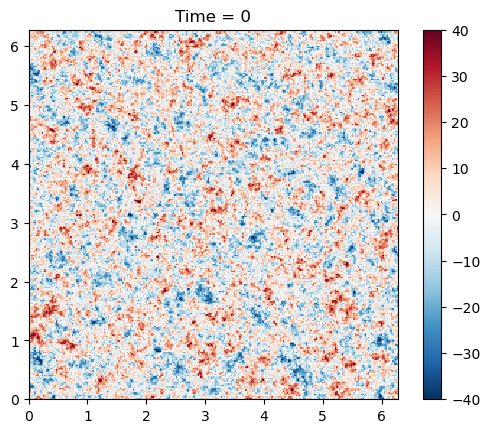

In [14]:
# define a quick function for plotting and visualize the initial condition
def plot_q(m, qmax=40):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    pc.set_clim([-qmax, qmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

plot_q(m)

INFO: Step: 1000, Time: 1.00e+00, KE: 4.96e-01, CFL: 0.106
INFO: Step: 2000, Time: 2.00e+00, KE: 4.95e-01, CFL: 0.097
INFO: Step: 3000, Time: 3.00e+00, KE: 4.94e-01, CFL: 0.090
INFO: Step: 4000, Time: 4.00e+00, KE: 4.94e-01, CFL: 0.102
INFO: Step: 5000, Time: 5.00e+00, KE: 4.94e-01, CFL: 0.100
INFO: Step: 6000, Time: 6.00e+00, KE: 4.93e-01, CFL: 0.093
INFO: Step: 7000, Time: 7.00e+00, KE: 4.93e-01, CFL: 0.102
INFO: Step: 8000, Time: 8.00e+00, KE: 4.93e-01, CFL: 0.126
INFO: Step: 9000, Time: 9.00e+00, KE: 4.93e-01, CFL: 0.112
INFO: Step: 10000, Time: 1.00e+01, KE: 4.93e-01, CFL: 0.101


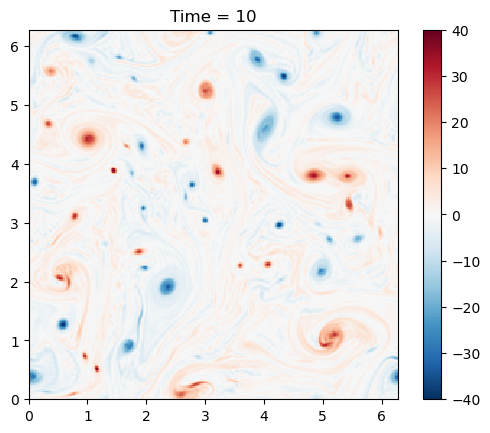

INFO: Step: 11000, Time: 1.10e+01, KE: 4.93e-01, CFL: 0.092
INFO: Step: 12000, Time: 1.20e+01, KE: 4.93e-01, CFL: 0.091
INFO: Step: 13000, Time: 1.30e+01, KE: 4.93e-01, CFL: 0.093
INFO: Step: 14000, Time: 1.40e+01, KE: 4.93e-01, CFL: 0.103
INFO: Step: 15000, Time: 1.50e+01, KE: 4.93e-01, CFL: 0.093
INFO: Step: 16000, Time: 1.60e+01, KE: 4.93e-01, CFL: 0.094
INFO: Step: 17000, Time: 1.70e+01, KE: 4.93e-01, CFL: 0.101
INFO: Step: 18000, Time: 1.80e+01, KE: 4.92e-01, CFL: 0.128
INFO: Step: 19000, Time: 1.90e+01, KE: 4.92e-01, CFL: 0.130
INFO: Step: 20000, Time: 2.00e+01, KE: 4.92e-01, CFL: 0.103


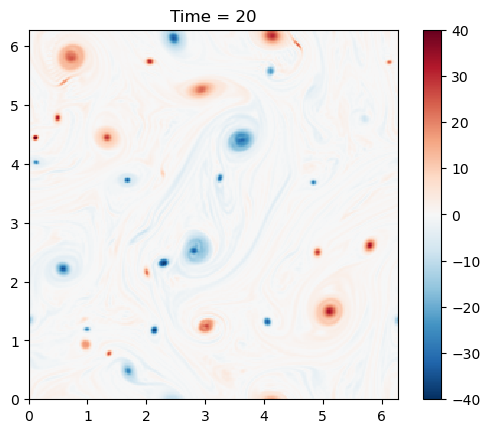

INFO: Step: 21000, Time: 2.10e+01, KE: 4.92e-01, CFL: 0.104
INFO: Step: 22000, Time: 2.20e+01, KE: 4.92e-01, CFL: 0.107
INFO: Step: 23000, Time: 2.30e+01, KE: 4.92e-01, CFL: 0.096
INFO: Step: 24000, Time: 2.40e+01, KE: 4.92e-01, CFL: 0.107
INFO: Step: 25000, Time: 2.50e+01, KE: 4.92e-01, CFL: 0.103
INFO: Step: 26000, Time: 2.60e+01, KE: 4.92e-01, CFL: 0.102
INFO: Step: 27000, Time: 2.70e+01, KE: 4.92e-01, CFL: 0.106
INFO: Step: 28000, Time: 2.80e+01, KE: 4.92e-01, CFL: 0.102
INFO: Step: 29000, Time: 2.90e+01, KE: 4.92e-01, CFL: 0.114
INFO: Step: 30000, Time: 3.00e+01, KE: 4.92e-01, CFL: 0.099


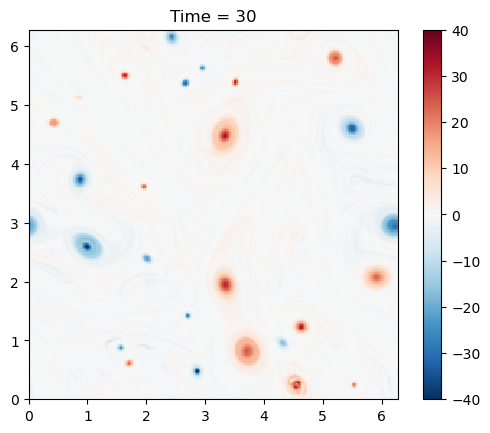

INFO: Step: 31000, Time: 3.10e+01, KE: 4.92e-01, CFL: 0.105
INFO: Step: 32000, Time: 3.20e+01, KE: 4.92e-01, CFL: 0.113
INFO: Step: 33000, Time: 3.30e+01, KE: 4.92e-01, CFL: 0.108
INFO: Step: 34000, Time: 3.40e+01, KE: 4.92e-01, CFL: 0.097
INFO: Step: 35000, Time: 3.50e+01, KE: 4.92e-01, CFL: 0.100
INFO: Step: 36000, Time: 3.60e+01, KE: 4.92e-01, CFL: 0.098
INFO: Step: 37000, Time: 3.70e+01, KE: 4.92e-01, CFL: 0.098
INFO: Step: 38000, Time: 3.80e+01, KE: 4.92e-01, CFL: 0.101
INFO: Step: 39000, Time: 3.90e+01, KE: 4.92e-01, CFL: 0.091
INFO: Step: 40000, Time: 4.00e+01, KE: 4.92e-01, CFL: 0.094


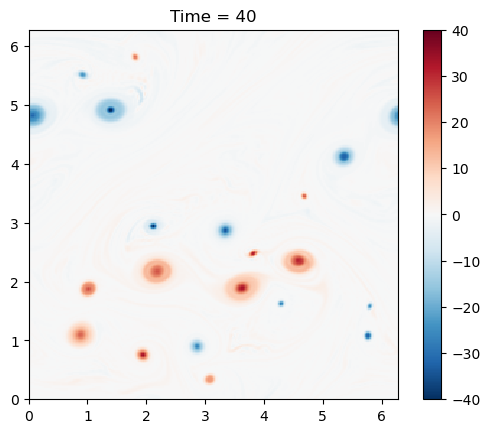

In [15]:
for _ in m.run_with_snapshots(tsnapstart=0, tsnapint=10):
    plot_q(m)

In [16]:
energy = m.get_diagnostic('KEspec')
enstrophy = m.get_diagnostic('Ensspec')

In [25]:
# this makes it easy to calculate an isotropic spectrum
from pyqg import diagnostic_tools as tools
kr, energy_iso = tools.calc_ispec(m,energy.squeeze())
_, enstrophy_iso = tools.calc_ispec(m,enstrophy.squeeze())

Text(0.5, 1.0, 'Energy Spectrum')

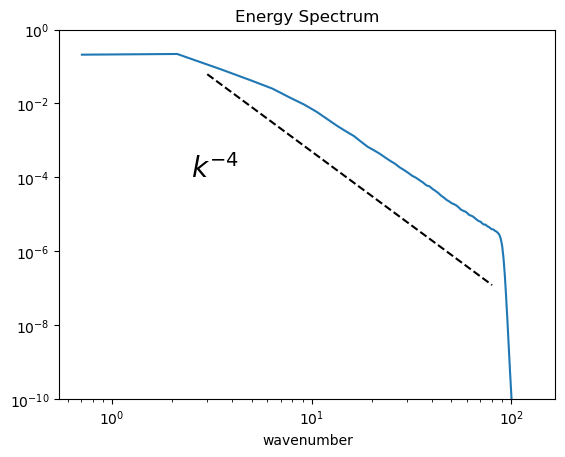

In [24]:
ks = np.array([3.,80])
es = 5*ks**-4
plt.loglog(kr,energy_iso)
plt.loglog(ks,es,'k--')
plt.text(2.5,.0001,r'$k^{-4}$',fontsize=20)
plt.ylim(1.e-10,1.e0)
plt.xlabel('wavenumber')
plt.title('Energy Spectrum')

Text(0.5, 1.0, 'Enstrophy Spectrum')

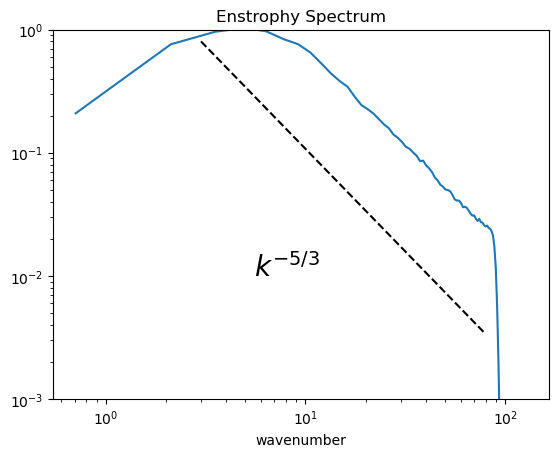

In [26]:
ks = np.array([3.,80])
es = 5*ks**(-5./3)
plt.loglog(kr,enstrophy_iso)
plt.loglog(ks,es,'k--')
plt.text(5.5,.01,r'$k^{-5/3}$',fontsize=20)
plt.ylim(1.e-3,1.e0)
plt.xlabel('wavenumber')
plt.title('Enstrophy Spectrum')
